<h2> Case Study: PCA, K-Means and Fuzzy C-Means on Football Player Data </h2>

In this case study, we will perform PCA, K-Means and Fuzzy C-Means on Football Player (FIFA 19) Data using Python.

### Dataset

FIFA 19 contains a rich dataset with plenty of attributes covering all aspects of a real-life footballer in an attempt to imitate him as much as possible in the virtual world. This rich dataset provides a huge oppurtunity for data scientists or data analysts to analyze and come up with visualizations and patterns. 

###  Import required modules

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly_express as px
%matplotlib inline

### Read data


In [53]:
#loading the data
df= pd.read_csv("fifa_dutch.csv")

### Inspect and explore 

In [54]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 89 columns):
Unnamed: 0                  151 non-null float64
ID                          151 non-null float64
Name                        151 non-null object
Age                         151 non-null float64
Photo                       151 non-null object
Nationality                 151 non-null object
Flag                        151 non-null object
Overall                     151 non-null float64
Potential                   151 non-null float64
Club                        151 non-null object
Club Logo                   151 non-null object
Value                       151 non-null object
Wage                        151 non-null object
Special                     151 non-null float64
Preferred Foot              151 non-null object
International Reputation    151 non-null float64
Weak Foot                   151 non-null int64
Skill Moves                 151 non-null float64
Work Rate               

### Data cleaning


In [57]:
#Dropping the unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 88 columns):
ID                          151 non-null float64
Name                        151 non-null object
Age                         151 non-null float64
Photo                       151 non-null object
Nationality                 151 non-null object
Flag                        151 non-null object
Overall                     151 non-null float64
Potential                   151 non-null float64
Club                        151 non-null object
Club Logo                   151 non-null object
Value                       151 non-null object
Wage                        151 non-null object
Special                     151 non-null float64
Preferred Foot              151 non-null object
International Reputation    151 non-null float64
Weak Foot                   151 non-null int64
Skill Moves                 151 non-null float64
Work Rate                   151 non-null object
Body Type                

In [59]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

We are only interested in those attributes that constitute the skillset of a football player. 

In [60]:
#creating a dataframe df_opa by selecting only the required columns
df_opa = df[['Name', 'Age', 'Overall', 'Potential', 'Value', 'International Reputation', 'Height', 'Weight', 'Crossing', 'Wage','Club','Nationality','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]
df_opa.head()

,Name,Age,Overall,Potential,Value,International Reputation,Height,Weight,Crossing,Wage,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,H. Ziyech,25.0,83.0,86.0,€32.5M,3.0,5'11,143lbs,84.0,€28K,...,75.0,71.0,62.0,75.0,88.0,73.0,83.0,52.0,66.0,36.0
1,M. de Ligt,18.0,82.0,91.0,€27M,2.0,6'2,196lbs,57.0,€11K,...,64.0,79.0,79.0,44.0,63.0,40.0,77.0,84.0,84.0,79.0
2,F. de Jong,21.0,81.0,89.0,€26M,1.0,5'11,154lbs,75.0,€19K,...,55.0,62.0,78.0,63.0,85.0,45.0,86.0,69.0,73.0,70.0
3,H. Lozano,22.0,81.0,86.0,€24M,3.0,5'9,154lbs,75.0,€22K,...,76.0,64.0,45.0,77.0,75.0,64.0,77.0,45.0,35.0,29.0
4,D. Tadić,29.0,81.0,81.0,€17.5M,3.0,5'11,168lbs,83.0,€26K,...,65.0,56.0,31.0,75.0,85.0,71.0,82.0,46.0,34.0,26.0


Currently, all the players in the dataset are sorted by their <b>'Overall'</b> value. We reorder the samples in the dataset as 'Clustering' algorithms get biased by order.

In [61]:
df_opa = df_opa.sample(100)

In [62]:
df_opa.head()

,Name,Age,Overall,Potential,Value,International Reputation,Height,Weight,Crossing,Wage,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
128,R. de Boer,20.0,67.0,78.0,€1M,1.0,6'2,192lbs,17.0,€3K,...,18.0,25.0,25.0,11.0,25.0,31.0,52.0,9.0,14.0,18.0
127,O. Mihálik,21.0,67.0,75.0,€1.1M,1.0,6'2,157lbs,52.0,€4K,...,55.0,54.0,27.0,65.0,67.0,62.0,63.0,34.0,18.0,20.0
116,J. Delle,28.0,68.0,69.0,€725K,1.0,6'2,185lbs,13.0,€4K,...,8.0,31.0,25.0,14.0,20.0,22.0,52.0,18.0,11.0,12.0
89,M. Romero,19.0,70.0,85.0,€3.8M,1.0,5'10,159lbs,45.0,€5K,...,65.0,49.0,17.0,65.0,52.0,59.0,67.0,22.0,21.0,18.0
12,S. Berghuis,26.0,79.0,80.0,€15M,2.0,6'0,159lbs,79.0,€20K,...,83.0,63.0,37.0,75.0,76.0,70.0,73.0,34.0,36.0,30.0


In [63]:
#converting the string currency to integer.

def currencyconversion(amount):
    n_amount = []
    for s in amount:
        list(s)
        abbr = s[-1]
        if abbr is 'M':
            s = s[1:-1]
            s = float(''.join(s))
            s *= 1000000
        elif abbr is 'K':
            s = s[1:-1]
            s = float(''.join(s))
            s *= 1000
        else:
            s = 0
        n_amount.append(s)
    return n_amount

In [64]:
df_opa['Value'] = currencyconversion(list(df_opa['Value']))
df_opa['Wage'] = currencyconversion(list(df_opa['Wage']))

In [65]:
df_opa.describe()

,Age,Overall,Potential,Value,International Reputation,Crossing,Wage,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,23.270000,71.830000,77.420000,5.206750e+06,1.220000,56.350000,10380.000000,52.350000,55.570000,65.410000,...,54.450000,59.180000,50.660000,55.430000,61.500000,53.060000,67.250000,49.95000,49.480000,46.960000
std,3.730451,4.259404,4.675706,5.954787e+06,0.483673,18.118786,9243.922382,19.106493,17.797546,13.107246,...,19.377888,16.338824,22.287479,19.428842,12.860165,13.069217,7.657274,21.42234,22.516203,22.545989
min,17.000000,65.000000,67.000000,6.250000e+05,1.000000,10.000000,1000.000000,9.000000,11.000000,17.000000,...,8.000000,22.000000,10.000000,8.000000,20.000000,16.000000,48.000000,9.00000,11.000000,11.000000
25%,20.000000,68.000000,74.000000,1.300000e+06,1.000000,44.750000,4000.000000,42.250000,45.750000,64.000000,...,41.000000,48.750000,27.000000,52.000000,55.000000,43.000000,62.750000,29.00000,28.000000,23.000000
50%,22.000000,72.000000,77.000000,3.100000e+06,1.000000,62.000000,8000.000000,54.500000,59.500000,68.000000,...,61.500000,62.000000,60.500000,62.500000,64.500000,55.000000,67.500000,59.00000,58.000000,52.000000
75%,26.000000,75.000000,80.250000,6.625000e+06,1.000000,68.000000,13000.000000,68.000000,70.000000,73.000000,...,69.000000,72.000000,70.000000,68.000000,70.250000,63.000000,72.000000,68.00000,70.000000,69.000000
max,35.000000,83.000000,91.000000,3.250000e+07,3.000000,84.000000,64000.000000,80.000000,81.000000,87.000000,...,83.000000,88.000000,80.000000,84.000000,88.000000,76.000000,86.000000,84.00000,84.000000,79.000000


### Distribution of Overall Rating

In [66]:
#styling for the plot
sns.set_style('dark')

Lets see the distribution of the Wage

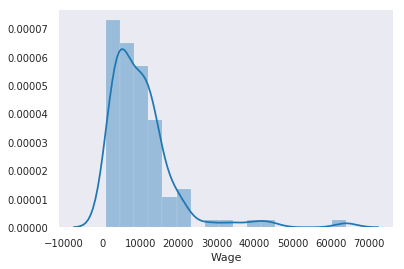

In [67]:
#histogram
sns.distplot(df_opa['Wage']);

You can observe that the wages of the footballers is skewed towards the left with many of them earning between <b>5-20K Euros</b> 

### How Potential of the Players are effecting the Wages?

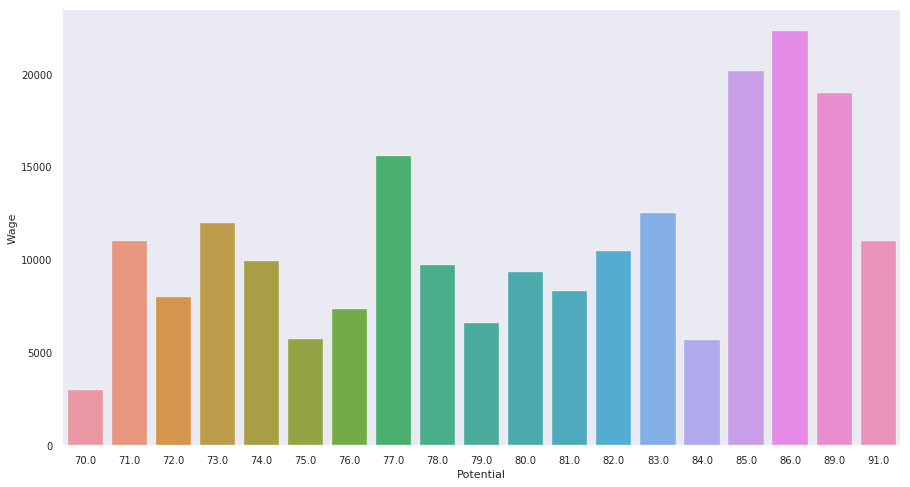

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_opa[df_opa['Potential']>=70]['Potential'],y=df_opa['Wage'],ci=0)

We can see a direct relationship between potential and wage.
Player with high potential are getting higher wages.

<Figure size 1440x1080 with 0 Axes>

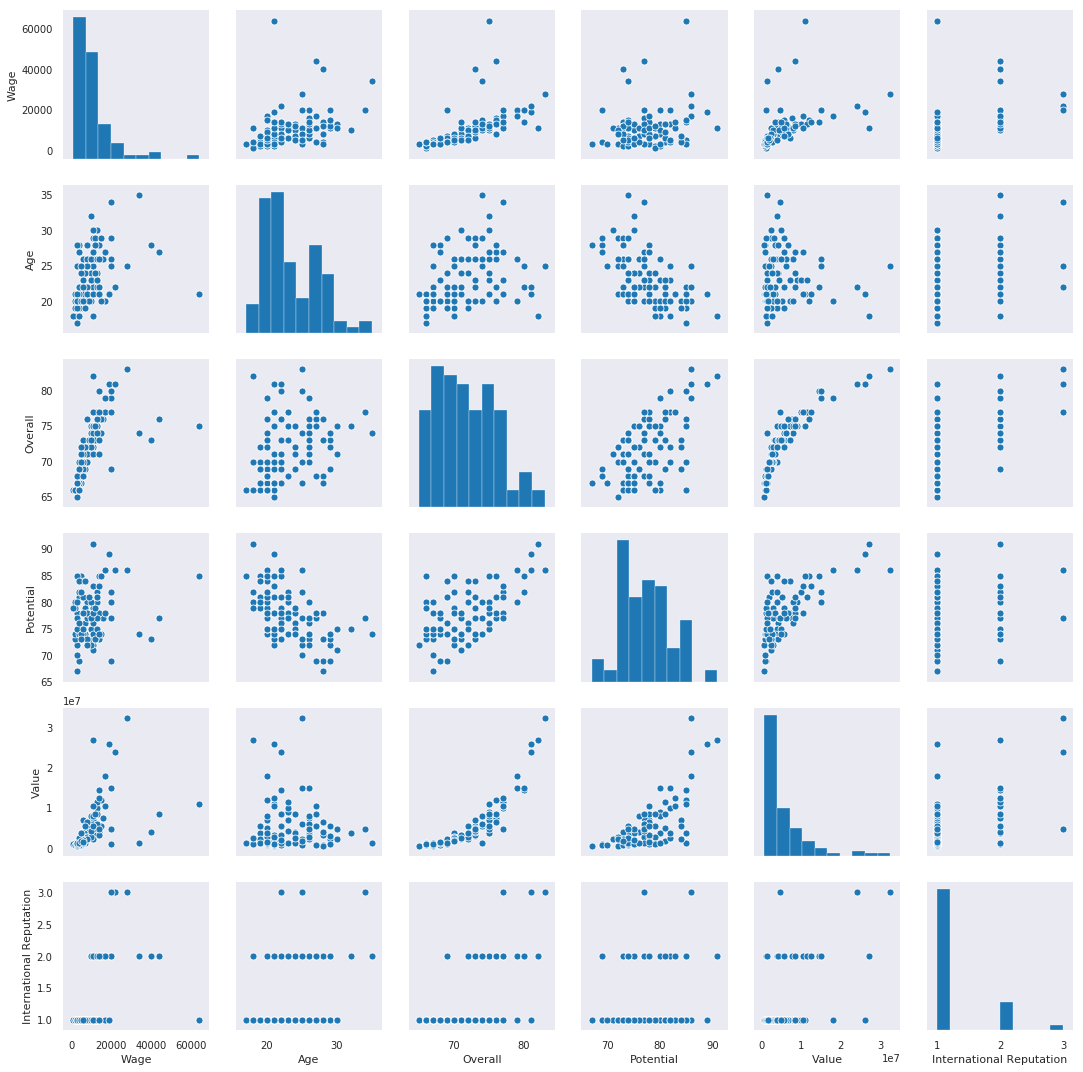

In [69]:
#pair plot showing dependencies with each other
plt.figure(figsize=(20,15))
df_opa2 = df_opa[["Wage",'Age', 'Overall', 'Potential', 'Value', 'International Reputation']]
sns.pairplot(df_opa2)

You can observe that <b>Wage, Value </b>and <b>Potential</b> are related to each other.

# Feature Transformation

From the above analysis, it is clear that we need to drop <b> Wage, Value and Potential </b>from the analysis as they are correlated. We need to focus only on the attributes of a footballer like <b>Passing, Shooting, Dribbling etc</b> and identify those footballers who are similar. Once we identify the clusters, we can formulate our transfer strategy.

In [70]:
df_pep = df_opa.drop([ 'Name', 'Club','Nationality','Overall','Potential','Height','Weight','Wage','Value'], axis=1)

In [71]:
df_pep.head()

,Age,International Reputation,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
128,20.0,1.0,17.0,15.0,12.0,22.0,17.0,19.0,20.0,15.0,...,18.0,25.0,25.0,11.0,25.0,31.0,52.0,9.0,14.0,18.0
127,21.0,1.0,52.0,66.0,62.0,53.0,58.0,70.0,56.0,46.0,...,55.0,54.0,27.0,65.0,67.0,62.0,63.0,34.0,18.0,20.0
116,28.0,1.0,13.0,9.0,16.0,17.0,9.0,10.0,10.0,20.0,...,8.0,31.0,25.0,14.0,20.0,22.0,52.0,18.0,11.0,12.0
89,19.0,1.0,45.0,75.0,66.0,55.0,62.0,64.0,44.0,42.0,...,65.0,49.0,17.0,65.0,52.0,59.0,67.0,22.0,21.0,18.0
12,26.0,2.0,79.0,75.0,48.0,76.0,74.0,82.0,86.0,74.0,...,83.0,63.0,37.0,75.0,76.0,70.0,73.0,34.0,36.0,30.0


We need to scale the features as some of the features like `Age` are in the range 16-40 whereas `Crossing` is in the range 0-100. We will use <b>MinMax scaling</b> since we want discover clusters with reference to the best and worst values of players across different attributes. 

In [72]:
from sklearn.preprocessing import MinMaxScaler
X_min = MinMaxScaler().fit_transform(df_pep)

In [73]:
X_min

array([[0.16666667, 0.        , 0.09459459, ..., 0.        , 0.04109589,
        0.10294118],
       [0.22222222, 0.        , 0.56756757, ..., 0.33333333, 0.09589041,
        0.13235294],
       [0.61111111, 0.        , 0.04054054, ..., 0.12      , 0.        ,
        0.01470588],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.06666667, 0.01369863,
        0.04411765],
       [0.16666667, 0.        , 0.40540541, ..., 0.36      , 0.10958904,
        0.05882353],
       [0.5       , 0.        , 0.45945946, ..., 0.4       , 0.35616438,
        0.27941176]])

# Clustering using PCA

Since we are dealing with a huge number of attributes - 31, our analysis will be paralyzed by the <b>'Curse of Dimensionality'</b>. So, let us perform <b>Principal Component Analysis</b> to identify those principal components that explain most of the variance in the dataset.

In [74]:
X_min.shape

(100, 31)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=31)
pca.fit(X_min)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([4.39758973e-01, 2.47017620e-01, 6.89722963e-02, 6.24701065e-02,
       4.01020543e-02, 2.15749939e-02, 1.69122654e-02, 1.38563122e-02,
       1.17642416e-02, 1.02752369e-02, 8.95964139e-03, 8.14904872e-03,
       6.14112338e-03, 5.64795606e-03, 5.37238964e-03, 4.76566545e-03,
       4.46340226e-03, 3.23168782e-03, 2.88246440e-03, 2.61301357e-03,
       2.28188316e-03, 2.12768723e-03, 1.87764494e-03, 1.70735610e-03,
       1.67823128e-03, 1.46065866e-03, 1.15243792e-03, 9.43424377e-04,
       7.78532799e-04, 6.32826538e-04, 4.28824718e-04])

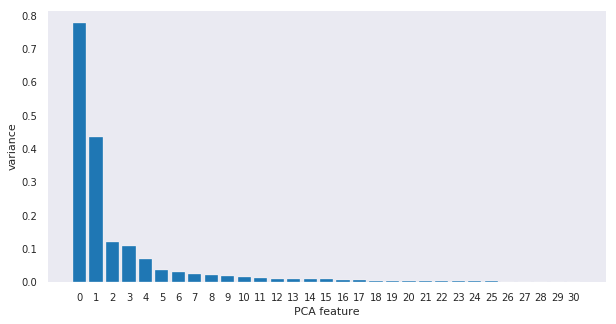

In [76]:
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

[ 43.98  68.68  75.58  81.83  85.84  88.    89.69  91.08  92.26  93.29
  94.19  95.    95.61  96.17  96.71  97.19  97.64  97.96  98.25  98.51
  98.74  98.95  99.14  99.31  99.48  99.63  99.75  99.84  99.92  99.98
 100.02]


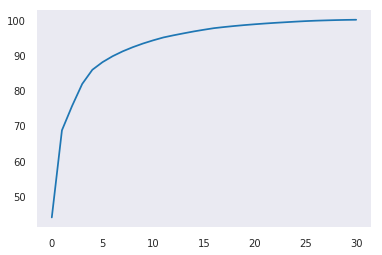

In [77]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

From the above cumulative variance plot, we can notice that 10 principal components are explaining 93% of the variance in the dataset. 

In [78]:
#Looking at above plot I'm taking 10 variables
pca = PCA(n_components=10)
Transformed_vector =pca.fit_transform(X_min)
print(Transformed_vector)

[[ 2.55776862e+00 -1.55856994e-01 -7.64054351e-02  3.11016952e-01
  -2.58470411e-01 -1.07879151e-01 -8.72391571e-02  8.75723182e-02
   3.46576999e-01 -2.10696536e-02]
 [ 1.93949877e-01 -7.50040083e-01 -1.09320444e-02 -2.95347294e-01
  -5.32286666e-02 -1.16999269e-01  1.18976532e-02 -1.23527345e-01
   4.10825799e-03  1.27934717e-01]
 [ 2.70735598e+00 -3.81598508e-02  6.00695032e-02  2.50537018e-01
  -9.84650825e-02 -1.79135182e-02 -1.65480074e-01 -2.32080965e-01
   1.95008375e-01 -1.24312793e-01]
 [ 2.49626196e-01 -8.11834385e-01  6.84932317e-02 -7.14617194e-01
   6.62656162e-02 -2.13697160e-02  3.60411319e-02  1.01782090e-01
   1.09551428e-01 -3.08981416e-02]
 [-8.53935301e-01 -8.82571398e-01  2.28487895e-01  4.05994478e-01
   4.36791148e-02 -1.82595288e-02 -1.63727650e-01 -7.36436688e-02
   2.04300169e-02 -9.58018725e-02]
 [-7.13684570e-01  3.22085105e-02  4.99699176e-01  1.83873803e-01
  -6.73195410e-01  1.90461258e-01  2.79476885e-01  7.95112922e-02
  -3.22991061e-01  1.75633990e-01

Let us explore the <b>Principal Components</b> using a scatter plot

Text(0, 0.5, 'PCA 2')

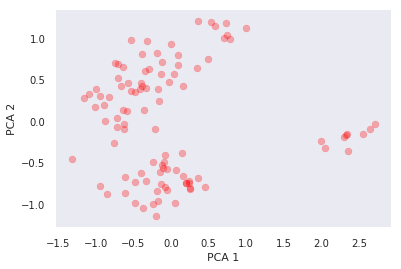

In [79]:
PCA_components = pd.DataFrame(Transformed_vector)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

You can notice that these principal components are indeed trying to separate out datapoints. Let us leverage this power of the principal components to discover <b>clusters</b> in the dataset using <b>'K Means'</b>.

In [80]:
#let's build clusters using the Transformed_vector
from sklearn.cluster import KMeans
num_of_clusters = range(2,25)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(Transformed_vector)
    error.append(clusters.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df

,Cluster_Numbers,Error_Term
0,2,1.053889
1,3,0.703977
2,4,0.540074
3,5,0.469330
4,6,0.413042
5,7,0.367483
6,8,0.343851
7,9,0.324389
8,10,0.307745
9,11,0.288509


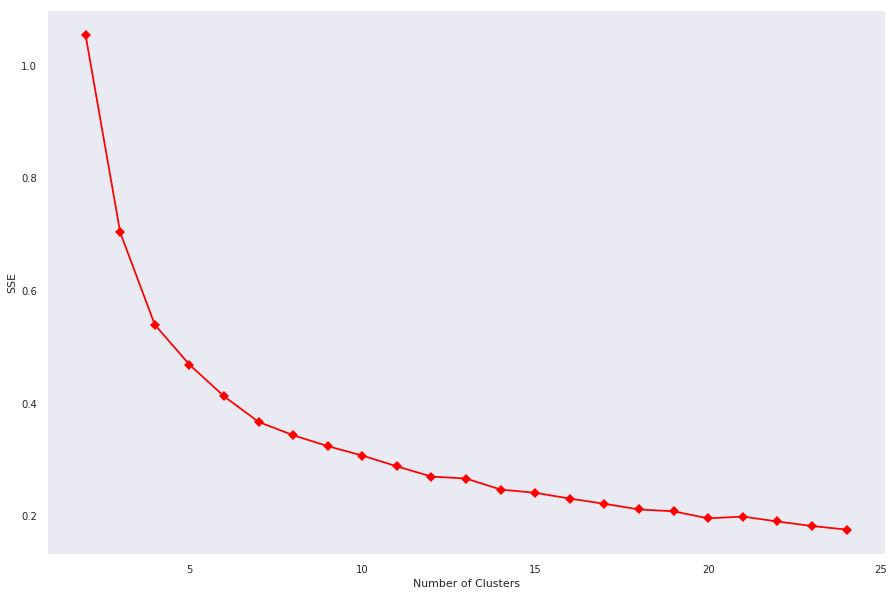

In [81]:
#Find the right number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

From the above elbow plot, it seems convergence started happening when the no.of clusters is <b>'5'</b>

In [82]:
#Build 5 clusters
clusters1 = KMeans(5)
clusters1.fit(Transformed_vector)
clusters1.labels_

array([2, 1, 2, 1, 3, 0, 4, 3, 3, 0, 4, 2, 4, 0, 1, 0, 0, 3, 3, 0, 4, 0,
       2, 4, 4, 4, 1, 0, 0, 2, 0, 0, 1, 3, 1, 3, 0, 0, 0, 4, 4, 0, 3, 1,
       4, 3, 0, 3, 3, 0, 1, 0, 3, 0, 1, 4, 3, 3, 4, 0, 0, 0, 1, 3, 0, 4,
       4, 4, 4, 3, 2, 3, 3, 1, 3, 4, 2, 4, 3, 4, 0, 1, 3, 2, 4, 0, 4, 0,
       4, 0, 0, 0, 4, 0, 1, 0, 0, 2, 1, 1], dtype=int32)

In [83]:
players = df_opa['Name']
wage = df_opa['Wage']/1000
overall = df_opa['Overall']
age = df_opa['Age']
value = df_opa['Value']/100000

In [84]:
dff = pd.DataFrame({'labels': clusters1.labels_, 'players': players, 'Wages in thousands':wage, 'overall':overall, 'age':age, 'Transfer value in millions':value})
dff.sort_values('labels')

,labels,players,Wages in thousands,overall,age,Transfer value in millions
55,0,R. Haps,11.0,74.0,25.0,60.00
51,0,G. Til,10.0,74.0,20.0,80.00
98,0,C. Eiting,7.0,70.0,20.0,27.00
15,0,J. Hendrix,13.0,77.0,23.0,100.00
35,0,J. van der Heijden,13.0,75.0,30.0,49.00
56,0,S. Wuytens,12.0,73.0,28.0,32.00
81,0,T. Ouwejan,8.0,71.0,22.0,27.00
70,0,A. Maher,10.0,72.0,24.0,39.00
76,0,N. Mazraoui,8.0,72.0,20.0,39.00
2,0,F. de Jong,19.0,81.0,21.0,260.00


# Analyze the Clusters

The main aim of <b>unsupervised learning</b> is to discover hidden patterns in the dataset that will help us in making decisions. Let us <b>summarize</b> the player clusters obtained above.

In [85]:
dff.groupby('labels').describe().transpose()

labels                                     0           1           2  \
Wages in thousands         count   32.000000   15.000000    9.000000   
                           mean    12.562500    9.466667   11.111111   
                           std      7.645102    5.423055    9.333333   
                           min      3.000000    3.000000    3.000000   
                           25%      9.500000    5.500000    5.000000   
                           50%     11.000000    7.000000   10.000000   
                           75%     13.000000   14.500000   11.000000   
                           max     44.000000   20.000000   34.000000   
overall                    count   32.000000   15.000000    9.000000   
                           mean    73.812500   71.400000   73.333333   
                           std      4.091198    3.718679    4.000000   
                           min     66.000000   66.000000   67.000000   
                           25%     71.000000   68.500000   72.000000   
                           50%     73.000000   70.000000   74.000000   
                           75%     76.250000   74.500000   75.000000   
                           max     83.000000   77.000000   80.000000   
age                        count   32.000000   15.000000    9.000000   
                           mean    23.875000   23.000000   26.444444   
                           std      3.190207    4.644505    5.150512   
                           min     18.000000   17.000000   20.000000   
                           25%     21.000000   19.500000   22.000000   
                           50%     23.500000   21.000000   27.000000   
                           75%     26.000000   26.000000   28.000000   
                           max     30.000000   34.000000   35.000000   
Transfer value in millions count   32.000000   15.000000    9.000000   
                           mean    76.554688   43.866667   44.916667   
                           std     78.011417   34.719008   42.467635   
                           min      9.000000   11.000000    7.250000   
                           25%     27.000000   14.500000   13.000000   
                           50%     46.000000   38.000000   38.000000   
                           75%     92.500000   55.000000   55.000000   
                           max    325.000000  120.000000  145.000000   

labels                                     3          4  
Wages in thousands         count   21.000000  23.000000  
                           mean    12.047619   6.130435  
                           std     14.971560   4.330697  
                           min      2.000000   1.000000  
                           25%      4.000000   3.000000  
                           50%      6.000000   5.000000  
                           75%     14.000000   9.500000  
                           max     64.000000  16.000000  
overall                    count   21.000000  23.000000  
                           mean    70.857143  69.652174  
                           std      4.486488   3.536931  
                           min     66.000000  65.000000  
                           25%     67.000000  66.500000  
                           50%     70.000000  69.000000  
                           75%     73.000000  72.500000  
                           max     81.000000  76.000000  
age                        count   21.000000  23.000000  
                           mean    21.904762  22.608696  
                           std      3.015042   3.115053  
                           min     19.000000  18.000000  
                           25%     20.000000  20.000000  
                           50%     21.000000  22.000000  
                           75%     22.000000  26.000000  
                           max     30.000000  28.000000  
Transfer value in millions count   21.000000  23.000000  
                           mean    51.333333  26.815217  
                           std     64.291005  24.387522  

<b>Here are some inferences you can draw from the above statistics to fine-tune your 'Transfer Strategy':</b>

1. If you are looking at controlling the <b>wages and transfer fee</b> and still get the brightest talent in the Dutch league, then you should focus on players in <b>Cluster 3</b>. The overall of players in this cluster is at par with those in other clusters and they have lower wages and transfer value than players in other clusters. 
2. If you have <b>unlimited budget to spend</b> and are focused only on getting the <b>top players</b> in the league, then you should focus on buying players in Clusters 0,1 and 4.
3. You need to be a bit careful with players in <b>Cluster 2</b> as there seem to be a lot of <b>outliers having high wages.</b>

# Fuzzy C-means

Now let us try building the clusters using an alternate approach - Fuzzy C-means algorithm

In [86]:
from fcmeans import FCM
fcm = FCM()
fcm.fit(Transformed_vector)
# outputs
fcm_centers = fcm.centers
#predicted clusters
fcm_labels  = fcm.u.argmax(axis=1)

In [87]:
cff = pd.DataFrame({'labels': fcm_labels, 'players': players, 'Wages in thousands':wage, 'overall':overall, 'age':age, 'Transfer value in millions':value})
cff.sort_values('labels')

,labels,players,Wages in thousands,overall,age,Transfer value in millions
16,0,K. Huntelaar,20.0,77.0,34.0,47.00
23,0,K. Dolberg,15.0,76.0,20.0,120.00
12,0,S. Berghuis,20.0,79.0,26.0,150.00
19,0,N. Jørgensen,17.0,77.0,27.0,105.00
11,0,S. Bergwijn,17.0,79.0,20.0,180.00
65,0,A. Özbiliz,40.0,73.0,28.0,40.00
74,0,M. Mahi,7.0,72.0,24.0,41.00
3,0,H. Lozano,22.0,81.0,22.0,240.00
0,0,H. Ziyech,28.0,83.0,25.0,325.00
80,1,S. Memišević,5.0,71.0,24.0,25.00


In [88]:
cff.groupby('labels').describe().transpose()

labels                                     0          1           2  \
Wages in thousands         count    9.000000   9.000000   13.000000   
                           mean    20.666667   6.222222   10.000000   
                           std      9.192388   3.700601    5.400617   
                           min      7.000000   3.000000    3.000000   
                           25%     17.000000   3.000000    7.000000   
                           50%     20.000000   5.000000   10.000000   
                           75%     22.000000  10.000000   11.000000   
                           max     40.000000  12.000000   20.000000   
overall                    count    9.000000   9.000000   13.000000   
                           mean    77.444444  69.888889   72.461538   
                           std      3.539460   3.018462    4.789144   
                           min     72.000000  66.000000   66.000000   
                           25%     76.000000  68.000000   69.000000   
                           50%     77.000000  69.000000   72.000000   
                           75%     79.000000  72.000000   74.000000   
                           max     83.000000  75.000000   82.000000   
age                        count    9.000000   9.000000   13.000000   
                           mean    25.111111  23.888889   22.846154   
                           std      4.400126   3.059593    3.387382   
                           min     20.000000  20.000000   18.000000   
                           25%     22.000000  21.000000   20.000000   
                           50%     25.000000  24.000000   22.000000   
                           75%     27.000000  26.000000   25.000000   
                           max     34.000000  28.000000   29.000000   
Transfer value in millions count    9.000000   9.000000   13.000000   
                           mean   138.666667  23.722222   60.057692   
                           std     97.457683  20.405822   75.240735   
                           min     40.000000   6.250000    9.000000   
                           25%     47.000000   8.750000   12.000000   
                           50%    120.000000  17.000000   27.000000   
                           75%    180.000000  27.000000   60.000000   
                           max    325.000000  70.000000  270.000000   

labels                                     3          5          6  \
Wages in thousands         count   17.000000   4.000000  12.000000   
                           mean    14.058824   8.250000   7.500000   
                           std      8.073650   5.315073   3.896385   
                           min      8.000000   2.000000   3.000000   
                           25%     11.000000   5.000000   4.750000   
                           50%     12.000000   8.500000   6.500000   
                           75%     13.000000  11.750000   8.750000   
                           max     44.000000  14.000000  15.000000   
overall                    count   17.000000   4.000000  12.000000   
                           mean    74.529412  69.750000  70.083333   
                           std      2.648529   2.500000   2.843120   
                           min     70.000000  66.000000  66.000000   
                           25%     73.000000  69.750000  68.000000   
                           50%     75.000000  71.000000  69.500000   
                           75%     76.000000  71.000000  72.250000   
                           max     81.000000  71.000000  75.000000   
age                        count   17.000000   4.000000  12.000000   
                           mean    24.529412  23.000000  22.000000   
                           std      3.104788   4.830459   3.618136   
                           min     20.000000  19.000000  17.000000   
                           25%     22.000000  20.500000  19.000000   
                           50%     24.000000  21.500000  21.000000   
                           75%     27.000000  

You can see that <b>Fuzzy C-means</b> was able to classify the players across 9 clusters compared to the 5 we have chosen with K-means. This gives you more options to further narrow-down your transfer strategy:
1. If you are looking at controlling the <b>wages and transfer fee</b> and still get the brightest talent in the Dutch league, then you should focus on players in <b>Cluster 2</b>. The overall of players in this cluster is at par with those in other clusters and they have lower wages and transfer value than players in other clusters. 
2. If you can <b>slightly increase your budget</b> and are focused only on getting the <b>top players</b> in the league, then you should focus on buying players in <b>Cluster 6</b>. Compared to clusters 5 and 9, players in this cluster seem to be more affordable.
3. You need to be a bit careful with players in <b>Cluster 4</b> as there seem to be a lot of <b>players with low overall demanding high wages and transfer fee</b>